# Визуализация решающих деревьев

In [1]:
import pandas as pd
from sklearn.tree import DecisionTreeClassifier 

## Данные

Датасет [Affairs](https://www.kaggle.com/clarkchong/fairs-affairs-dataset) про измены в браке

```
Number of observations: 6366
Number of variables: 9
Variable name definitions:


affairs
numeric. How often engaged in extramarital sexual intercourse during the past year? 0 = none, 1 = once, 2 = twice, 3 = 3 times, 7 = 4–10 times, 12 = monthly, 12 = weekly, 12 = daily.

gender
factor indicating gender.

age
numeric variable coding age in years: 17.5 = under 20, 22 = 20–24, 27 = 25–29, 32 = 30–34, 37 = 35–39, 42 = 40–44, 47 = 45–49, 52 = 50–54, 57 = 55 or over.

yearsmarried
numeric variable coding number of years married: 0.125 = 3 months or less, 0.417 = 4–6 months, 0.75 = 6 months–1 year, 1.5 = 1–2 years, 4 = 3–5 years, 7 = 6–8 years, 10 = 9–11 years, 15 = 12 or more years.

children
factor. Are there children in the marriage?

religiousness
numeric variable coding religiousness: 1 = anti, 2 = not at all, 3 = slightly, 4 = somewhat, 5 = very.

education
numeric variable coding level of education: 9 = grade school, 12 = high school graduate, 14 = some college, 16 = college graduate, 17 = some graduate work, 18 = master's degree, 20 = Ph.D., M.D., or other advanced degree.

occupation
numeric variable coding occupation according to Hollingshead classification (reverse numbering).

rating
numeric variable coding self rating of marriage: 1 = very unhappy, 2 = somewhat unhappy, 3 = average, 4 = happier than average, 5 = very happy.



```


In [2]:
affairs_data = pd.read_csv('https://raw.githubusercontent.com/esolovev/ling2020/main/lectures/Affairs.csv')

## Подготовка данных

In [3]:
affairs_data = affairs_data.drop(columns=['Unnamed: 0'])

In [4]:
affairs_data.shape

(601, 9)

In [5]:
affairs_data.head()

,affairs,gender,age,yearsmarried,children,religiousness,education,occupation,rating
0,0,male,37.0,10.00,no,3,18,7,4
1,0,female,27.0,4.00,no,4,14,6,4
2,0,female,32.0,15.00,yes,1,12,1,4
3,0,male,57.0,15.00,yes,5,18,6,5
4,0,male,22.0,0.75,no,2,17,6,3


Кодируем строковые переменные:

In [6]:
affairs_data.gender = [0 if value == 'male' else 1 for value in affairs_data.gender]

In [7]:
affairs_data.children = [0 if value == 'no' else 1 for value in affairs_data.children]

Давайте закодируем affairs в бинарную переменную и позанимаемся классификацией

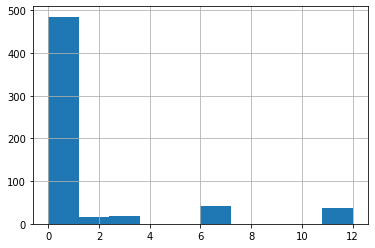

In [8]:
affairs_data.affairs.hist()

In [9]:
X = affairs_data.drop(columns=['affairs'])

In [10]:
y = [0 if value == 0 else 1 for value in affairs_data.affairs]

## Обучение

In [11]:
from sklearn.model_selection import train_test_split

In [12]:
SEED = 128

In [13]:
# количество объектов в классах несбалансированное, 0 сильно больше, чем 1
# используем парметр startify, 
# чтобы в обучающей и тестовой выборке баланс классов был примерно одинаковым
X_train, X_test, y_train, y_test = train_test_split(X, y, stratify=y, random_state=SEED)

In [24]:
dtc = DecisionTreeClassifier(random_state=SEED, max_depth=3)

In [25]:
dtc.fit(X_train, y_train)

DecisionTreeClassifier(class_weight=None, criterion='gini', max_depth=3,
                       max_features=None, max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, presort=False,
                       random_state=128, splitter='best')

### Посмотрим на качество

In [26]:
from sklearn.metrics import classification_report

In [27]:
y_pred = dtc.predict(X_test)

In [28]:
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.79      0.91      0.84       113
           1       0.50      0.26      0.34        38

    accuracy                           0.75       151
   macro avg       0.64      0.59      0.59       151
weighted avg       0.71      0.75      0.72       151



## Визуализация

### Текстовое представление

https://scikit-learn.org/stable/modules/generated/sklearn.tree.export_text.html#sklearn.tree.export_text

In [29]:
from sklearn.tree import export_text

In [30]:
X_train.columns

Index(['gender', 'age', 'yearsmarried', 'children', 'religiousness',
       'education', 'occupation', 'rating'],
      dtype='object')

In [31]:
text_representation = export_text(dtc, feature_names=list(X_train.columns))
print(text_representation)

|--- rating <= 2.50
|   |--- age <= 49.50
|   |   |--- age <= 29.50
|   |   |   |--- class: 0
|   |   |--- age >  29.50
|   |   |   |--- class: 1
|   |--- age >  49.50
|   |   |--- class: 0
|--- rating >  2.50
|   |--- yearsmarried <= 2.75
|   |   |--- education <= 13.00
|   |   |   |--- class: 1
|   |   |--- education >  13.00
|   |   |   |--- class: 0
|   |--- yearsmarried >  2.75
|   |   |--- religiousness <= 1.50
|   |   |   |--- class: 0
|   |   |--- religiousness >  1.50
|   |   |   |--- class: 0



### plot_tree из sklearn

https://scikit-learn.org/stable/modules/generated/sklearn.tree.plot_tree.html#sklearn.tree.plot_tree

In [32]:
from sklearn.tree import plot_tree
import matplotlib.pyplot as plt

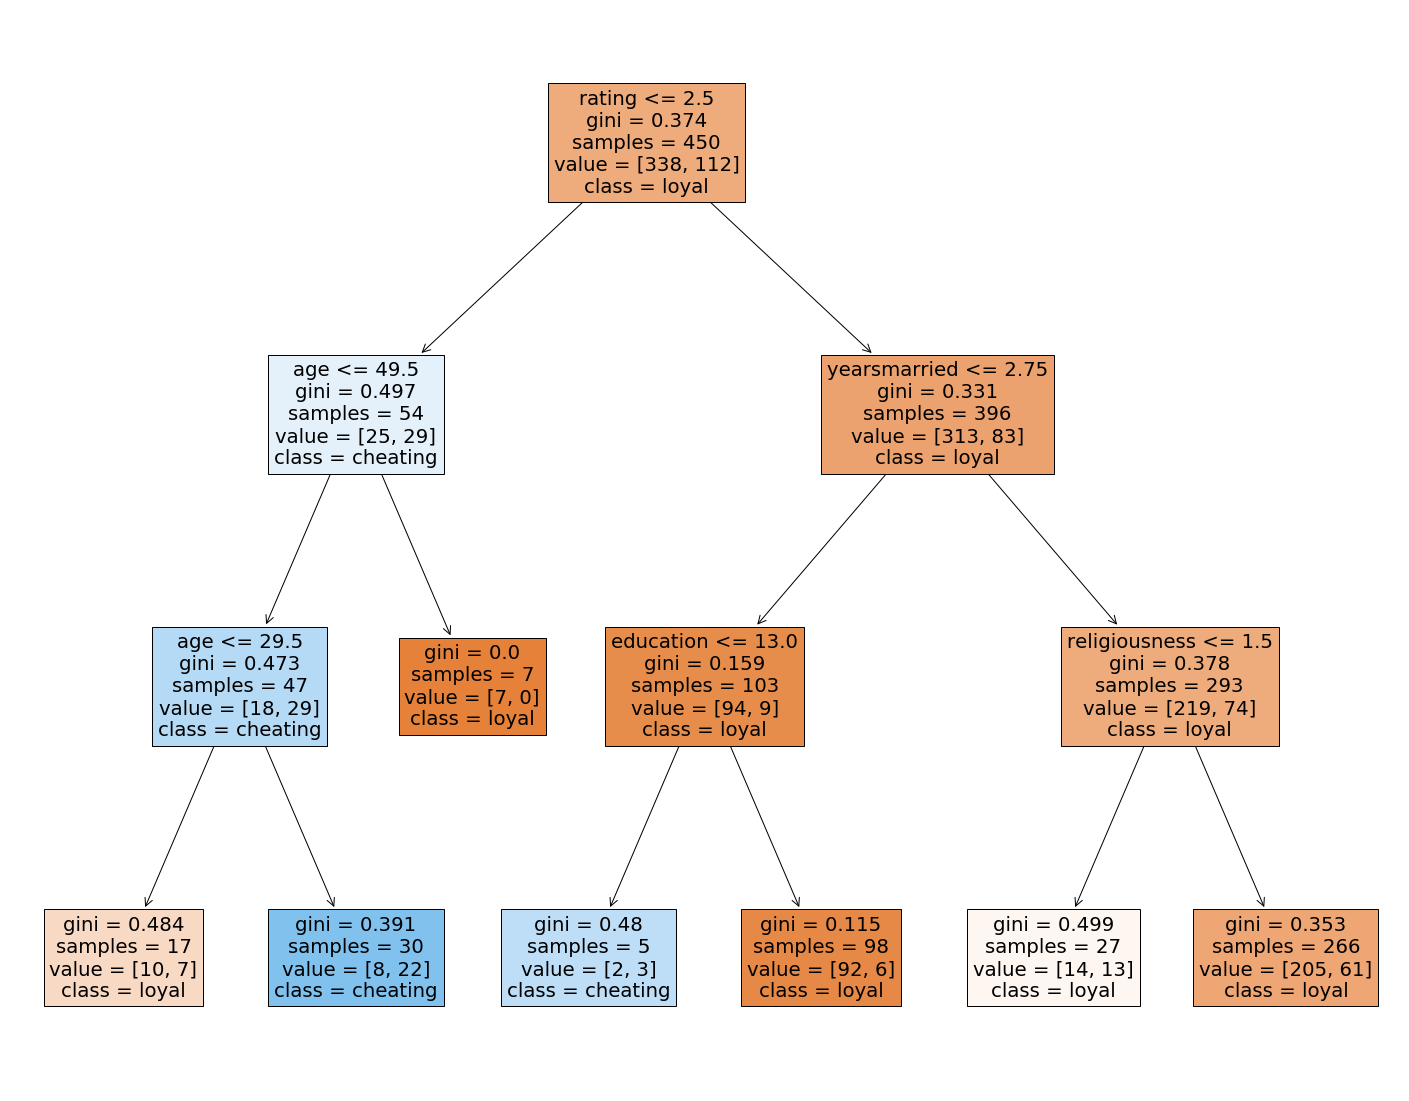

In [33]:
fig = plt.figure(figsize=(25,20))
tree_plt = plot_tree(
    dtc, 
    feature_names=list(X_train.columns),
    class_names=['loyal', 'cheating'], # названия классов, 0 - loyal, 1 - cheating 
    filled=True # покрасить в соответвии с количеством объектов правильного класса
    )
# левая стрелка - да, правая стрелка - нет

In [ ]:
# если хотим сохранить картинку
# fig.savefig("decistion_tree.png")

### graphviz

In [34]:
! pip install graphviz

In [35]:
import graphviz
from sklearn.tree import export_graphviz

In [36]:
# dot 
dot_data = export_graphviz(
    dtc, 
    feature_names=list(X_train.columns),
    class_names=['loyal', 'cheating'], # названия классов, 0 - loyal, 1 - cheating  
    filled=True # покрасить в соответвии с количеством объектов правильного класса
    )

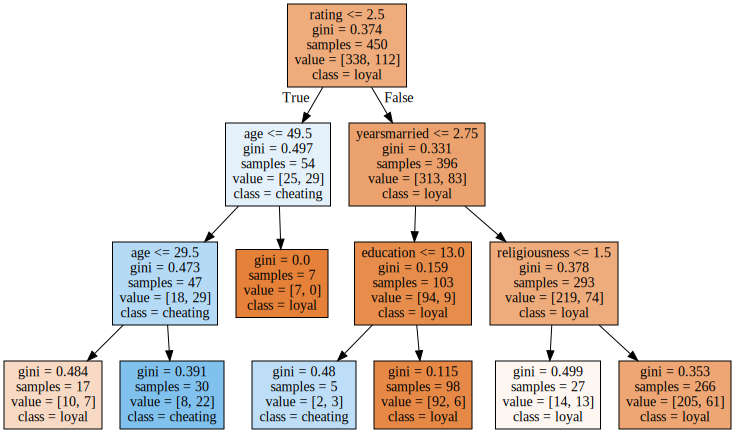

In [37]:
# рисуем дерево
graph = graphviz.Source(dot_data, format="png") 
graph

### dtreeviz

Помимо дерева нарисует симпатичные диаграммы и вообще классно выглядит

In [38]:
! pip install dtreeviz

In [39]:
from dtreeviz.trees import dtreeviz

findfont: Font family ['Arial'] not found. Falling back to DejaVu Sans.
findfont: Font family ['Arial'] not found. Falling back to DejaVu Sans.
findfont: Font family ['Arial'] not found. Falling back to DejaVu Sans.


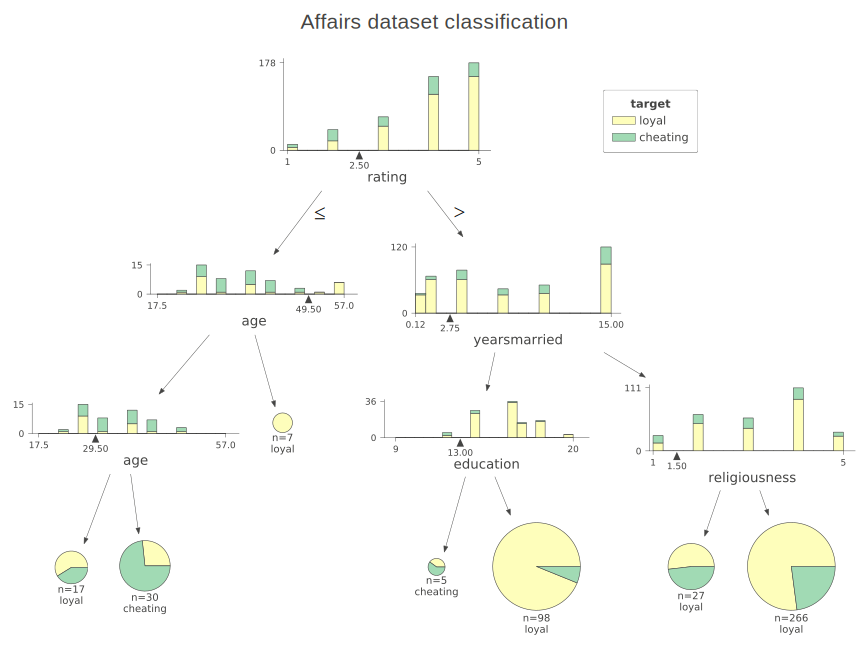

In [40]:
viz = dtreeviz(dtc, 
               X_train, 
               pd.Series(y_train),
                target_name="target",
                feature_names=X_train.columns,
                title="Affairs dataset classification",
                class_names=['loyal', 'cheating'], 
               scale=1.5 # регулируем размер картинки
               )
viz

**Вопросы**:
+ какие признаки оказались важными, а какие бесполезными для модели?
+ 3 самых важных признака
+ что можно сказать про измены и возраст?
+ что можо сказать про измены и длительность брака?
+ какой узел в дереве бесполезный? почему он появился?

In [41]:
X_train.columns

Index(['gender', 'age', 'yearsmarried', 'children', 'religiousness',
       'education', 'occupation', 'rating'],
      dtype='object')

In [42]:
dtc.feature_importances_

array([0.        , 0.25389124, 0.15339672, 0.        , 0.11497665,
       0.10187329, 0.        , 0.3758621 ])